In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

def prepare_data(data_file_name):
    """
    Responsible for cleaning the data file provided from the UCI machine
    learning repository here: http://archive.ics.uci.edu/ml/datasets/Mushroom.
    The function then produces two CSV files appropriately formatted to be
    used in TensorFlow where the CSV files split with respect to
    training and testing data.
    """

    # The header is formed from the 'agaricus-lepiota.name' file found on
    # http://archive.ics.uci.edu/ml/datasets/Mushroom
    header = ['class', 'cap_shape', 'cap_surface',
              'cap_color', 'bruises', 'odor', 'gill_attachment',
              'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
              'stalk_root', 'stalk_surface_above_ring',
              'stalk_surface_below_ring', 'stalk_color_above_ring',
              'stalk_color_below_ring', 'veil_type', 'veil_color',
              'ring_number', 'ring_type', 'spore_print_color',
              'population', 'habitat']
    df = pd.read_csv(data_file_name, sep=',', names=header)

    # Entries with a '?' indicate a missing piece of data, and
    # these entries are dropped from our dataset.
    df.replace('?', np.nan, inplace=True)
    df.dropna(inplace=True)

    # The class of poisonous or edible is indicated in the data as
    # either 'p' or 'e' respectively. We require that this is numeric,
    # and therefore use '0' to indicate poisonous (or not edible) and
    # '1' to indicate edible.
    df['class'].replace('p', 0, inplace=True)
    df['class'].replace('e', 1, inplace=True)

    # Since we are dealing with non-numeric feature data, or in other
    # words, categorical data, we need to replace these with numerical
    # equivalents. Pandas has a nice function called "get_dummies" that
    # performs this task.
    cols_to_transform = header[1:]
    df = pd.get_dummies(df, columns=cols_to_transform)

    # We can now split the data into two separate data frames,
    # one for training, which will constitute the bulk of the
    # data, and one for testing.
    df_train, df_test = train_test_split(df, test_size=0.1)

    # Determine the number of rows and columns in each of the
    # data frames.
    num_train_entries = df_train.shape[0]
    num_train_features = df_train.shape[1] - 1

    num_test_entries = df_test.shape[0]
    num_test_features = df_test.shape[1] - 1

    # The data frames are written as a temporary CSV file, as we still
    # need to modify the header row to include the number of rows and
    # columns present in the training and testing CSV files.
    df_train.to_csv('mushroom_train.csv', index=False)
    df_test.to_csv('mushroom_test.csv', index=False)

    
MUSHROOM_DATA_FILE = "agaricus-lepiota.data"

# Prepare the mushroom data for TensorFlow by
# creating two train / test CSV files.
prepare_data(MUSHROOM_DATA_FILE)

In [5]:
df_train = pd.read_csv('mushroom_train.csv')
print(df_train.head())

train_label = np.array(df_train['class'])
train_data =  np.array(df_train.drop('class', axis=1))

   class  cap_shape_b  cap_shape_c  cap_shape_f  cap_shape_k  cap_shape_s  \
0      0            0            0            0            0            0   
1      0            0            0            1            0            0   
2      1            0            0            1            0            0   
3      1            0            0            1            0            0   
4      1            0            0            1            0            0   

   cap_shape_x  cap_surface_f  cap_surface_g  cap_surface_s  ...  \
0            1              0              0              0  ...   
1            0              1              0              0  ...   
2            0              0              0              0  ...   
3            0              0              0              0  ...   
4            0              0              0              0  ...   

   population_n  population_s  population_v  population_y  habitat_d  \
0             0             0             0             

In [6]:
df_test = pd.read_csv('mushroom_test.csv')
print(df_test.head())
test_label = np.array(df_test['class'])
test_data =  np.array(df_test.drop('class', axis=1))

   class  cap_shape_b  cap_shape_c  cap_shape_f  cap_shape_k  cap_shape_s  \
0      1            0            0            0            0            0   
1      1            0            0            1            0            0   
2      0            0            0            1            0            0   
3      1            0            0            1            0            0   
4      1            0            0            0            0            0   

   cap_shape_x  cap_surface_f  cap_surface_g  cap_surface_s  ...  \
0            1              0              0              0  ...   
1            0              1              0              0  ...   
2            0              0              0              1  ...   
3            0              1              0              0  ...   
4            1              1              0              0  ...   

   population_n  population_s  population_v  population_y  habitat_d  \
0             0             0             0             

In [14]:
print(train_data.shape, ' ', train_label.shape)
print(test_data.shape, ' ', test_label.shape)
print(train_data)

(5079, 98)   (5079,)
(565, 98)   (565,)
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 0]]


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.compat.v1.reset_default_graph()

## build model
## write your code here


model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(98,)),   
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3168      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________


In [20]:
## training 
## write your code here

history = model.fit(train_data, train_label, batch_size=256, epochs=10, validation_split=0.3, verbose=2)

Epoch 1/10
14/14 - 1s - loss: 0.4823 - accuracy: 0.8312 - val_loss: 0.3854 - val_accuracy: 0.8438 - 857ms/epoch - 61ms/step
Epoch 2/10
14/14 - 0s - loss: 0.3039 - accuracy: 0.8698 - val_loss: 0.2339 - val_accuracy: 0.8937 - 66ms/epoch - 5ms/step
Epoch 3/10
14/14 - 0s - loss: 0.1718 - accuracy: 0.9491 - val_loss: 0.1228 - val_accuracy: 0.9862 - 78ms/epoch - 6ms/step
Epoch 4/10
14/14 - 0s - loss: 0.0876 - accuracy: 0.9927 - val_loss: 0.0614 - val_accuracy: 0.9961 - 78ms/epoch - 6ms/step
Epoch 5/10
14/14 - 0s - loss: 0.0467 - accuracy: 0.9955 - val_loss: 0.0348 - val_accuracy: 0.9987 - 71ms/epoch - 5ms/step
Epoch 6/10
14/14 - 0s - loss: 0.0280 - accuracy: 0.9975 - val_loss: 0.0215 - val_accuracy: 0.9987 - 75ms/epoch - 5ms/step
Epoch 7/10
14/14 - 0s - loss: 0.0178 - accuracy: 0.9983 - val_loss: 0.0142 - val_accuracy: 0.9993 - 76ms/epoch - 5ms/step
Epoch 8/10
14/14 - 0s - loss: 0.0117 - accuracy: 0.9997 - val_loss: 0.0097 - val_accuracy: 1.0000 - 69ms/epoch - 5ms/step
Epoch 9/10
14/14 - 0s 

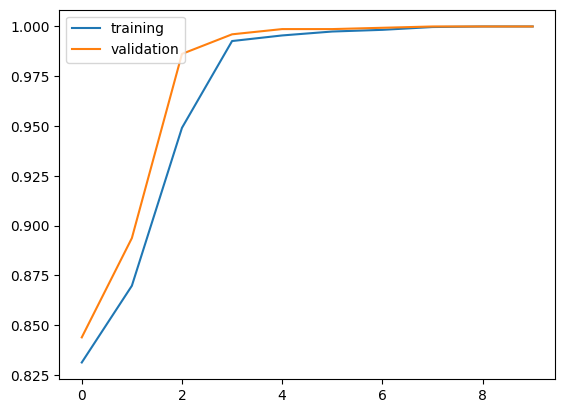

18/18 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3168      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000


In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

result = model.evaluate(test_data, test_label)
## save model
model.save('dnn_mnist_model.h5')
new_model = keras.models.load_model('dnn_mnist_model.h5')
new_model.summary()
result = new_model.evaluate(test_data, test_label)
## write your code here

In [9]:
## load model and use test data to evaluate result
print(result)

18/18 [==============================] - 0s 720us/step - loss: 4.1889e-04 - accuracy: 1.0000
[0.0004188868042547256, 1.0]
